In [1]:
import os
import binascii
from Crypto.Cipher import AES
from Crypto import Random
import numpy as np
import pandas as pd
import subprocess
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#making a cipher object using AES in CFB Mode

key = 'Sixteen byte key'
#generate random initialization vector
#iv = Random.new().read(AES.block_size)

iv = 'Sixteen byte key'
cipher = AES.new(key, iv)

#generate encrypted message
msg = cipher.encrypt('Attack at dawn')
print(msg)
#print(cipher.encrypt('Attack at dawn'))

TypeError: an integer is required

In [3]:
#convert ciphertext from byte literal to hex (i.e. basic alphanumeric text)
print(msg.hex())

#convert ciphertext from byte literal to binary values (i.e. 1's and 0's)
msg2 = bin(int(msg.hex(), 16))[2:]
print(bin(int(msg.hex(), 16))[2:])

79164f31fcd72d25092ce2696ab0
111100100010110010011110011000111111100110101110010110100100101000010010010110011100010011010010110101010110000


In [4]:
#setting directory in command line
os.chdir('/Users/JackNelson/Documents/SMU/MSDS 7349/Project')

In [6]:
#run Randomness Test 1 in command line
text = "echo " + msg2 + " | randomtests/testrandom.py -x -t 1"
temp1 = subprocess.check_output(text, shell=True)
print(temp1)

b'# monobitfrequencytest\n0.924381706931\n'


Iteration 1 :  0.563702861651
Iteration 2 :  0.705456986111
Iteration 3 :  0.292062006489
Iteration 4 :  0.705456986111
Iteration 5 :  0.775837674218
Iteration 6 :  0.702917563245
Iteration 7 :  0.502552871598
Iteration 8 :  0.570750388058
Iteration 9 :  0.773845960494
Iteration 10 :  0.705456986111


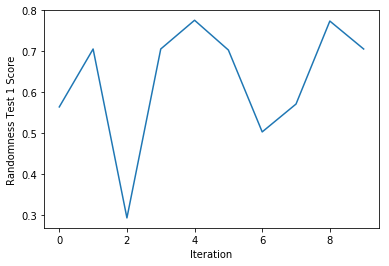

In [34]:
#running a loop of 10 separate encryption iterations on the same plaintext
randtest1 = [0] * 10
length = [0] * 10

for i in range(10):

    msg = cipher.encrypt('Attack at dawn')
    msg2 = bin(int(msg.hex(), 16))[2:]

    text = "echo " + msg2 + " | randomtests/testrandom.py -x -t 1"

    temp1 = subprocess.check_output(text, shell=True)
    temp2 = float(temp1.decode("utf-8").split("\n")[1])
    print("Iteration",i+1,": ",temp2)

    randtest1[i] = temp2
    length[i] = len(msg2)

#plotting results
plt.plot(randtest1)
plt.xlabel('Iteration')
plt.ylabel('Randomness Test 1 Score')
plt.show()    

Iteration 1 :  0.850106739139   112  bits
Iteration 2 :  0.893219746394   222  bits
Iteration 3 :  0.912596336123   332  bits
Iteration 4 :  0.924381706931   444  bits
Iteration 5 :  1.0   554  bits
Iteration 6 :  0.938227043516   666  bits
Iteration 7 :  1.0   778  bits
Iteration 8 :  0.840427397736   888  bits
Iteration 9 :  0.924381706931   999  bits
Iteration 10 :  0.652694215728   1111  bits


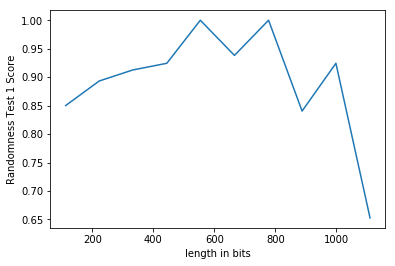

In [30]:
#running a loop of 10 encryption iterations on the same plaintext appending to eachother in succession
randtest1 = [0] * 10
length = [0] * 10
msg3 = ""

for i in range(10):

    msg = cipher.encrypt('Attack at dawn')
    msg2 = bin(int(msg.hex(), 16))[2:]
    msg3 += msg2

    text = "echo " + msg3 + " | randomtests/testrandom.py -x -t 1"

    temp1 = subprocess.check_output(text, shell=True)
    temp2 = float(temp1.decode("utf-8").split("\n")[1])
    print("Iteration",i+1,": ",temp2," ",len(msg3)," bits")

    randtest1[i] = temp2
    length[i] = len(msg3)

#plotting results
plt.plot(length,randtest1)
plt.xlabel('length in bits')
plt.ylabel('Randomness Test 1 Score')
plt.show()

In [82]:
#run Randomness Test 2 in command line
text = "echo " + msg2 + " | randomtests/testrandom.py -x -t 2"
subprocess.check_output(text, shell=True)

CalledProcessError: Command 'echo 111100100010110010011110011000111111100110101110010110100100101000010010010110011100010011010010110101010110000 | randomtests/testrandom.py -x -t 2' returned non-zero exit status 1.

In [84]:
#run Randomness Test 3 in command line
text = "echo " + msg2 + " | randomtests/testrandom.py -x -t 3"
subprocess.check_output(text, shell=True)

b'# runstest\n0.21688234602\n'

In [85]:
#run Randomness Test 4 in command line
text = "echo " + msg2 + " | randomtests/testrandom.py -x -t 4"
subprocess.check_output(text, shell=True)

b'longestrunones10000 failed, too few bits: 111\n# longestrunones10000\n0\n'

In [87]:
#run Randomness Test 5 in command line
text = "echo " + msg2 + " | randomtests/testrandom.py -x -t 5"
subprocess.check_output(text, shell-True)

FileNotFoundError: [Errno 2] No such file or directory: 'echo 111100100010110010011110011000111111100110101110010110100100101000010010010110011100010011010010110101010110000 | randomtests/testrandom.py -x -t 5'

In [89]:
#run Randomness Test 6 in command line
text = "echo " + msg2 + " | randomtests/testrandom.py -x -t 6"
subprocess.check_output(text, shell=True)

b'# spectraltest\n0.527726619866\n'

In [90]:
#run Randomness Test 7 in command line
text = "echo " + msg2 + " | randomtests/testrandom.py -x -t 7"
subprocess.check_output(text, shell=True)

b'# nonoverlappingtemplatematchingtest\n0.9999999976\n'

In [91]:
#run Randomness Test 8 in command line
text = "echo " + msg2 + " | randomtests/testrandom.py -x -t 8"
subprocess.check_output(text, shell=True)

CalledProcessError: Command 'echo 111100100010110010011110011000111111100110101110010110100100101000010010010110011100010011010010110101010110000 | randomtests/testrandom.py -x -t 8' returned non-zero exit status 1.

In [92]:
#run Randomness Test 9 in command line
text = "echo " + msg2 + " | randomtests/testrandom.py -x -t 9"
subprocess.check_output(text, shell=True)

CalledProcessError: Command 'echo 111100100010110010011110011000111111100110101110010110100100101000010010010110011100010011010010110101010110000 | randomtests/testrandom.py -x -t 9' returned non-zero exit status 1.

In [93]:
#run Randomness Test 10 in command line
text = "echo " + msg2 + " | randomtests/testrandom.py -x -t 10"
subprocess.check_output(text, shell=True)

b'# linearcomplexitytest\nnan\n'

In [94]:
#run Randomness Test 11 in command line
text = "echo " + msg2 + " | randomtests/testrandom.py -x -t 11"
subprocess.check_output(text, shell=True)

b'# serialtest\n[0.49896108745859735, 0.498530755295295]\n'

In [95]:
#run Randomness Test 12 in command line
text = "echo " + msg2 + " | randomtests/testrandom.py -x -t 12"
subprocess.check_output(text, shell=True)

b'# aproximateentropytest\n1.0\n'

In [96]:
#run Randomness Test 13 in command line
text = "echo " + msg2 + " | randomtests/testrandom.py -x -t 13"
subprocess.check_output(text, shell=True)

b'# cumultativesumstest\n0.765209734422\n'

In [97]:
#run Randomness Test 14 in command line
text = "echo " + msg2 + " | randomtests/testrandom.py -x -t 14"
subprocess.check_output(text, shell=True)

b'# randomexcursionstest\n[0.90468270035307952, 0.82083596921449631, 0.59833218809307287, 0.39409642576839066, 0.020199260939674654, 0.30090445380747954, 0.19326394404389954, 0.035919875686789442]\n'

In [98]:
#run Randomness Test 15 in command line
text = "echo " + msg2 + " | randomtests/testrandom.py -x -t 15"
subprocess.check_output(text, shell=True)

b'# randomexcursionsvarianttest\n[0.56949427799171892, 0.54482685051726665, 0.51540569886903975, 0.47950012218695348, 0.43436976365621416, 0.37539918556594054, 0.29426610430496292, 0.17573433564422514, 0.055008833629265723, 0.0028375448887923154, 0.084837744796570427, 0.84876650101685547, 0.62874517627383308, 0.56967158158796638, 0.84707855556944489, 0.95284757656495267, 0.82572104038223659, 0.67911568929281607]\n'

In [99]:
#run Randomness Test 16 in command line
text = "echo " + msg2 + " | randomtests/testrandom.py -x -t 16"
subprocess.check_output(text, shell=True)

b'# cumultativesumstestreverse\n0.676271137413\n'

In [100]:
#run Randomness Test 17 in command line
text = "echo " + msg2 + " | randomtests/testrandom.py -x -t 17"
subprocess.check_output(text, shell=True)

b'# lempelzivcompressiontest\n0.0\n'